<a href="https://colab.research.google.com/github/Lokhande10/Building_Data_Science_Apps/blob/main/Building_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 49.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install streamlit

     |████████████████████████████████| 9.7 MB 15.6 MB/s 
     |████████████████████████████████| 4.3 MB 43.8 MB/s 
     |████████████████████████████████| 111 kB 60.9 MB/s 
     |████████████████████████████████| 164 kB 48.8 MB/s 
     |████████████████████████████████| 181 kB 52.5 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 128 kB 53.0 MB/s 
     |████████████████████████████████| 792 kB 47.1 MB/s 
     |████████████████████████████████| 380 kB 46.8 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=a3d420bb5e8584b0ff46f83cc8ee0efaea783358f077729a468693f583d30849
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      

In [ ]:
import yfinance as yf
import streamlit as st

st.write("""
# Simple Stock Price App
Shown are the stock closing price and volume of Google!
""")

# https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75
#define the ticker symbol
tickerSymbol = 'GOOGL'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2020-5-31')
# Open	High	Low	Close	Volume	Dividends	Stock Splits

st.line_chart(tickerDf.Close)
st.line_chart(tickerDf.Volume)

2022-02-23 04:45:04.627 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
# Application 1   Stock price app

In [ ]:
import yfinance as yf
import streamlit as st

st.write("""
# Simple Stock Price App
Shown are the stock closing price and volume of Google!
""")

# https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75
#define the ticker symbol
tickerSymbol = 'GOOGL'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2020-5-31')
# Open	High	Low	Close	Volume	Dividends	Stock Splits

st.line_chart(tickerDf.Close)
st.line_chart(tickerDf.Volume)

In [ ]:
# Application_3 EDA NBA app

In [ ]:
mport streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.title('NBA Player Stats Explorer')

st.markdown("""
This app performs simple webscraping of NBA player stats data!
* **Python libraries:** base64, pandas, streamlit
* **Data source:** [Basketball-reference.com](https://www.basketball-reference.com/).
""")

st.sidebar.header('User Input Features')
selected_year = st.sidebar.selectbox('Year', list(reversed(range(1950,2020))))

# Web scraping of NBA player stats
@st.cache
def load_data(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header = 0)
    df = html[0]
    raw = df.drop(df[df.Age == 'Age'].index) # Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)

# Sidebar - Team selection
sorted_unique_team = sorted(playerstats.Tm.unique())
selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)

# Sidebar - Position selection
unique_pos = ['C','PF','SF','PG','SG']
selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)

# Filtering data
df_selected_team = playerstats[(playerstats.Tm.isin(selected_team)) & (playerstats.Pos.isin(selected_pos))]

st.header('Display Player Stats of Selected Team(s)')
st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
st.dataframe(df_selected_team)

# Download NBA player stats data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="playerstats.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_team), unsafe_allow_html=True)

# Heatmap
if st.button('Intercorrelation Heatmap'):
    st.header('Intercorrelation Matrix Heatmap')
    df_selected_team.to_csv('output.csv',index=False)
    df = pd.read_csv('output.csv')

    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
    st.pyplot()

In [ ]:
#APP- 5 # S&P500 Data

In [ ]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

st.title('S&P 500 App')

st.markdown("""
This app retrieves the list of the **S&P 500** (from Wikipedia) and its corresponding **stock closing price** (year-to-date)!
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn
* **Data source:** [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
""")

st.sidebar.header('User Input Features')

# Web scraping of S&P 500 data
#
@st.cache
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby('GICS Sector')

# Sidebar - Sector selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

# Filtering data
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

# Download S&P500 data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)

# https://pypi.org/project/yfinance/

data = yf.download(
        tickers = list(df_selected_sector[:10].Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

# Plot Closing Price of Query Symbol
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return st.pyplot()

num_company = st.sidebar.slider('Number of Companies', 1, 5)

if st.button('Show Plots'):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector.Symbol)[:num_company]:
        price_plot(i)

In [ ]:
#App_8

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier

st.write("""
# Penguin Prediction App
This app predicts the **Palmer Penguin** species!
Data obtained from the [palmerpenguins library](https://github.com/allisonhorst/palmerpenguins) in R by Allison Horst.
""")

st.sidebar.header('User Input Features')

st.sidebar.markdown("""
[Example CSV input file](https://raw.githubusercontent.com/dataprofessor/data/master/penguins_example.csv)
""")

# Collects user input features into dataframe
uploaded_file = st.sidebar.file_uploader("Upload your input CSV file", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
else:
    def user_input_features():
        island = st.sidebar.selectbox('Island',('Biscoe','Dream','Torgersen'))
        sex = st.sidebar.selectbox('Sex',('male','female'))
        bill_length_mm = st.sidebar.slider('Bill length (mm)', 32.1,59.6,43.9)
        bill_depth_mm = st.sidebar.slider('Bill depth (mm)', 13.1,21.5,17.2)
        flipper_length_mm = st.sidebar.slider('Flipper length (mm)', 172.0,231.0,201.0)
        body_mass_g = st.sidebar.slider('Body mass (g)', 2700.0,6300.0,4207.0)
        data = {'island': island,
                'bill_length_mm': bill_length_mm,
                'bill_depth_mm': bill_depth_mm,
                'flipper_length_mm': flipper_length_mm,
                'body_mass_g': body_mass_g,
                'sex': sex}
        features = pd.DataFrame(data, index=[0])
        return features
    input_df = user_input_features()

# Combines user input features with entire penguins dataset
# This will be useful for the encoding phase
penguins_raw = pd.read_csv('penguins_cleaned.csv')
penguins = penguins_raw.drop(columns=['species'])
df = pd.concat([input_df,penguins],axis=0)

# Encoding of ordinal features
# https://www.kaggle.com/pratik1120/penguin-dataset-eda-classification-and-clustering
encode = ['sex','island']
for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]
df = df[:1] # Selects only the first row (the user input data)

# Displays the user input features
st.subheader('User Input features')

if uploaded_file is not None:
    st.write(df)
else:
    st.write('Awaiting CSV file to be uploaded. Currently using example input parameters (shown below).')
    st.write(df)

# Reads in saved classification model
load_clf = pickle.load(open('penguins_clf.pkl', 'rb'))

# Apply model to make predictions
prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)


st.subheader('Prediction')
penguins_species = np.array(['Adelie','Chinstrap','Gentoo'])
st.write(penguins_species[prediction])

st.subheader('Prediction Probability')
st.write(prediction_proba)

In [ ]:
Image result for what is shap plot
How to interpret the shap summary plot?

    The y-axis indicates the variable name, in order of importance from top to bottom. The value next to them is the mean SHAP value.
    On the x-axis is the SHAP value. ...
    Gradient color indicates the original value for that variable. ...
    Each point represents a row from the original dataset.

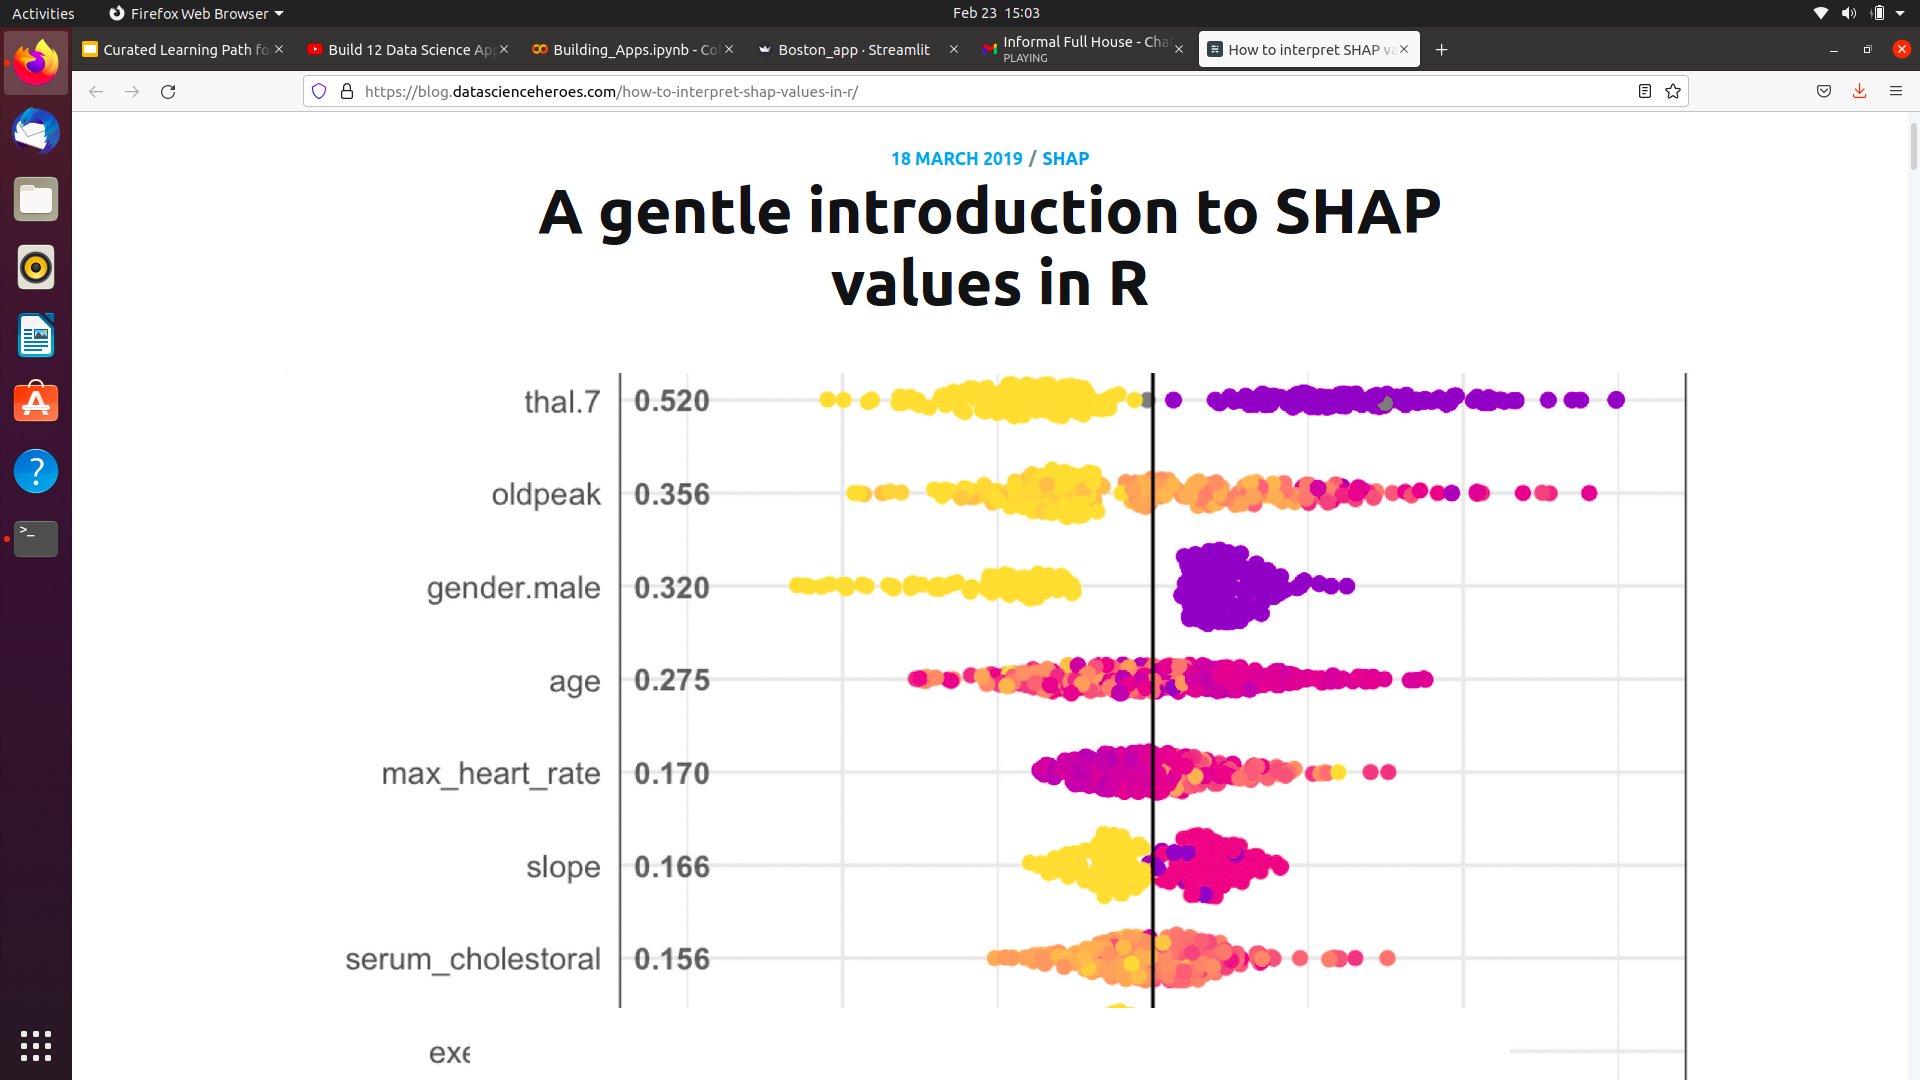

In [ ]:
import pandas as pd
penguins = pd.read_csv('penguins_cleaned.csv')

# Ordinal feature encoding
# https://www.kaggle.com/pratik1120/penguin-dataset-eda-classification-and-clustering
df = penguins.copy()
target = 'species'
encode = ['sex','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

target_mapper = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
def target_encode(val):
    return target_mapper[val]

df['species'] = df['species'].apply(target_encode)

# Separating X and y
X = df.drop('species', axis=1)
Y = df['species']

# Build random forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, Y)

# Saving the model
import pickle
pickle.dump(clf, open('penguins_clf.pkl', 'wb'))

In [ ]:
#App Boston housing

In [ ]:
import streamlit as st
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

st.write("""
# Boston House Price Prediction App
This app predicts the **Boston House Price**!
""")
st.write('---')

# Loads the Boston House Price Dataset
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.DataFrame(boston.target, columns=["MEDV"])

# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

def user_input_features():
    CRIM = st.sidebar.slider('CRIM', X.CRIM.min(), X.CRIM.max(), X.CRIM.mean())
    ZN = st.sidebar.slider('ZN', X.ZN.min(), X.ZN.max(), X.ZN.mean())
    INDUS = st.sidebar.slider('INDUS', X.INDUS.min(), X.INDUS.max(), X.INDUS.mean())
    CHAS = st.sidebar.slider('CHAS', X.CHAS.min(), X.CHAS.max(), X.CHAS.mean())
    NOX = st.sidebar.slider('NOX', X.NOX.min(), X.NOX.max(), X.NOX.mean())
    RM = st.sidebar.slider('RM', X.RM.min(), X.RM.max(), X.RM.mean())
    AGE = st.sidebar.slider('AGE', X.AGE.min(), X.AGE.max(), X.AGE.mean())
    DIS = st.sidebar.slider('DIS', X.DIS.min(), X.DIS.max(), X.DIS.mean())
    RAD = st.sidebar.slider('RAD', X.RAD.min(), X.RAD.max(), X.RAD.mean())
    TAX = st.sidebar.slider('TAX', X.TAX.min(), X.TAX.max(), X.TAX.mean())
    PTRATIO = st.sidebar.slider('PTRATIO', X.PTRATIO.min(), X.PTRATIO.max(), X.PTRATIO.mean())
    B = st.sidebar.slider('B', X.B.min(), X.B.max(), X.B.mean())
    LSTAT = st.sidebar.slider('LSTAT', X.LSTAT.min(), X.LSTAT.max(), X.LSTAT.mean())
    data = {'CRIM': CRIM,
            'ZN': ZN,
            'INDUS': INDUS,
            'CHAS': CHAS,
            'NOX': NOX,
            'RM': RM,
            'AGE': AGE,
            'DIS': DIS,
            'RAD': RAD,
            'TAX': TAX,
            'PTRATIO': PTRATIO,
            'B': B,
            'LSTAT': LSTAT}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Main Panel

# Print specified input parameters
st.header('Specified Input parameters')
st.write(df)
st.write('---')

# Build Regression Model
model = RandomForestRegressor()
model.fit(X, Y)
# Apply Model to Make Prediction
prediction = model.predict(df)

st.header('Prediction of MEDV')
st.write(prediction)
st.write('---')

# Explaining the model's predictions using SHAP values
# https://github.com/slundberg/shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

st.header('Feature Importance')
plt.title('Feature importance based on SHAP values')
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')
st.write('---')

plt.title('Feature importance based on SHAP values (Bar)')
shap.summary_plot(shap_values, X, plot_type="bar")
st.pyplot(bbox_inches='tight')